## Применение коэффициентов калибровки

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
#from tqdm import tqdm
#import math as mt
import numpy as np
import seaborn as sns

In [90]:
# считать данные, заменив 0 на NaN
na_values = ['N/A', '0']
datum11588 = pd.read_csv('./data/11588.work.csv', na_values=na_values, header = None, index_col=False, sep=',')
datum11589 = pd.read_csv('./data/11589.work.csv', na_values=na_values, header = None, index_col=False, sep=',')
datum11308 = pd.read_csv('./data/11308.work.csv', na_values=na_values, header = None, index_col=False, sep=',')
datum11452 = pd.read_csv('./data/11452.work.csv', na_values=na_values, header = None, index_col=False, sep=',')
datum12114 = pd.read_csv('./data/12114.work.csv', na_values=na_values, header = None, index_col=False, sep=',')

# убрать последние три канала
param = [i for i in range(109)]
datum11588 = datum11588[param]
datum11589 = datum11589[param]
datum11308 = datum11308[param]
datum11452 = datum11452[param]
datum12114 = datum12114[param]

# отрицательные значения заменить на маленькое положительное 0.001
# маленькие значения заменить на маленькое положительное minpos
minpos = 0.0001
data = [datum11588, datum11589,datum11308, datum11452, datum12114]
for datum in data:
    for i in range(datum.shape[1]):
        zero_cell = datum[i] <= 0.01
        datum.loc[zero_cell, i] = minpos
    datum.fillna(0.001, inplace = True)

In [3]:
datum11588.head(12)

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,0.0001,0.0001,0.0001,0.0001,1.1000,0.5000,0.0001,0.9500,1.0500,0.3800,...,0.0900,0.0001,0.0001,0.0001,0.5400,0.0001,1.0700,0.0001,0.0001,0.0001
1,0.1900,0.9800,0.0001,0.0001,0.0001,0.5500,0.9200,0.6700,0.5500,0.3200,...,0.1400,0.2000,0.6800,0.0001,0.4800,0.0001,0.6800,0.0001,0.0001,0.0001
2,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.8400,0.9500,0.0500,0.3800,...,1.0900,0.6000,0.6100,0.0001,0.5400,0.3100,1.0700,0.0001,0.0001,0.0500
3,0.1900,0.0001,0.1200,0.8000,0.0001,0.0001,0.0001,0.0001,0.5500,0.0001,...,0.1400,0.2000,0.6800,0.0001,0.4800,0.0001,0.0001,0.5800,0.0001,0.0001
4,0.1300,0.0001,0.4700,0.6400,0.1000,0.0001,0.0001,0.0001,0.0500,0.0001,...,0.0900,0.0001,0.0001,0.0900,0.0001,0.0001,0.0700,0.0001,0.6900,0.0500
5,0.0001,0.0001,0.1200,0.8000,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.1400,0.2000,0.0001,0.0001,0.4800,0.0001,0.0001,0.0001,0.0001,0.4400
6,0.0001,0.0001,0.0001,0.0001,1.1000,0.5000,0.0001,0.0001,0.0500,0.0001,...,0.0900,0.6000,0.0001,0.0900,0.5400,0.3100,0.0700,0.0001,0.0001,0.0500
7,0.0001,0.0001,0.0001,0.0001,0.0001,0.5500,0.0001,0.6700,0.0001,0.0001,...,0.1400,0.2000,0.0001,0.0001,0.4800,0.3700,0.6800,0.0001,0.5000,0.4400
8,0.1300,0.0001,0.0001,0.0001,0.0001,0.5000,0.8400,1.9500,1.0500,0.0001,...,0.0001,0.6000,0.6100,0.0900,0.5400,2.3100,0.0700,0.0001,0.6900,0.0500
9,0.1900,0.0001,0.0001,0.0001,0.0001,0.0001,0.9200,2.6700,1.5500,0.3200,...,0.1400,0.2000,1.6800,0.0001,0.0001,1.3700,0.6800,0.0001,0.0001,0.4400


In [91]:
sum11588 = datum11588[400:500].sum()
sum11589 = datum11589[400:950].sum()
sum11308 = datum11308[400:500].sum()
sum11452 = datum11452[400:500].sum()
sum12114 = datum12114[400:850].sum()

In [92]:
data  = [datum11588, datum11589, datum11308, datum11452, datum12114]
frame = [datum11588, datum11589, datum11308, datum11452, datum12114]
suma  = [sum11588, sum11589,sum11308, sum11452, sum12114]
title = ['11588', '11589','11308','11452', '12114']

In [93]:
from matplotlib import colors

import retina
x=retina.x
y=retina.y
C=retina.C
N=retina.N

xmin = min(x)-3
xmax = max(x)+3
ymin = min(y)-1
ymax = max(y)+1

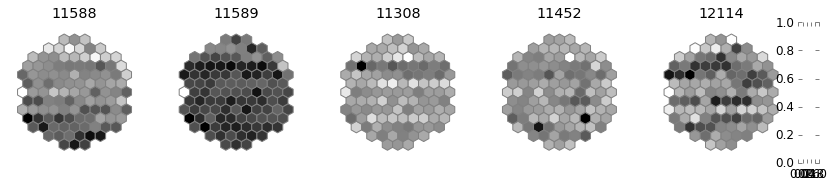

In [94]:
nn=5
fig, axn = plt.subplots(1, nn, sharex=True, sharey=True, figsize=(14,2.5))
#cmap = colors.ListedColormap(['white', 'yellow', 'orange'])
plt.rcParams['axes.linewidth'] = 0.0
plt.rcParams['font.size'] = 12
cbar_ax  = fig.add_axes([.91, .12, .02, .78])
cbar_kws = {"label":'log10 (A)'}

for i in range(nn):
    hb = axn[i].hexbin(x, y, C=np.log(suma[i]),gridsize=(10,6), 
                       cmap="gist_yarg", edgecolor='gray',                
                #cbar_ax  = None if i else cbar_ax,
                #cbar_kws = None if i else cbar_kws
                )
    axn[i].axis([xmin, xmax, ymin, ymax])
    axn[i].axes.get_xaxis().set_visible(False)
    axn[i].axes.get_yaxis().set_visible(False)
    axn[i].set_title(title[i])    

In [31]:
calib11588 = pd.read_csv('./data/cal/pyro/11588.cal.csv', header = None, index_col=False, sep=',')
calib11588

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,1.385521,1.107038,1.461141,1.636801,1.04468,1.609332,1.1422,0.941509,1.159711,1.646469,...,1.977787,1.75789,1.758487,1.779258,1.899122,0.649608,1.489423,2.056424,1.094232,2.766522


In [95]:
title = ['11588', '11589','11308','11452', '12114']
caldim = []
for i in range(len(title)):
    name = './data/cal/pyro/'+title[i]+'.cal.csv'
    #print(name)
    cali = pd.read_csv(name, header = None, index_col=False, sep=',')
    caldim.append(cali)
caltim = []
for i in range(len(title)):
    name = './data/cal/timur/'+title[i]+'.cal.csv'
    #print(name)
    cali = pd.read_csv(name, header = None, index_col=False, sep=',')
    caltim.append(cali)

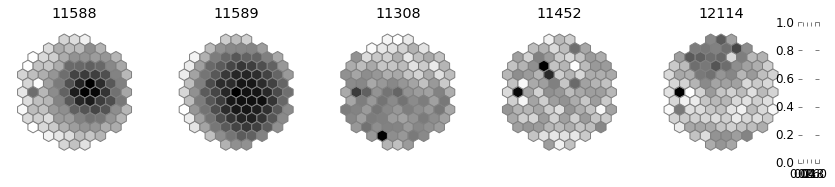

In [96]:
nn=5
fig, axn = plt.subplots(1, nn, sharex=True, sharey=True, figsize=(14,2.5))
#cmap = colors.ListedColormap(['white', 'yellow', 'orange'])
plt.rcParams['axes.linewidth'] = 0.0
plt.rcParams['font.size'] = 12
cbar_ax  = fig.add_axes([.91, .12, .02, .78])
cbar_kws = {"label":'log10 (A)'}

for i in range(nn):
    axn[i].axis([xmin, xmax, ymin, ymax])
    axn[i].axes.get_xaxis().set_visible(False)
    axn[i].axes.get_yaxis().set_visible(False)
    axn[i].set_title(title[i]) 
    amp = []
    for ch in range(109):
        #amp.append( suma[i][N[ch]-1]*caldim[i][N[ch]-1] )
        amp.append( suma[i][N[ch]-1]*caltim[i][N[ch]-1] )
    hb = axn[i].hexbin(x, y, C=np.log(amp),gridsize=(10,6), 
                       cmap="gist_yarg", edgecolor='gray',                
                #cbar_ax  = None if i else cbar_ax,
                #cbar_kws = None if i else cbar_kws
                )


In [66]:
caldim[2][73], caldim[2][82]

(0    0.763556
 Name: 73, dtype: float64, 0    0.462448
 Name: 82, dtype: float64)

In [63]:
suma[2][73], suma[2][82]

(77.466000000000122, 1403.5542999999973)

In [86]:
suma[2][73]*caldim[2][73]

0    59.149629
Name: 73, dtype: float64

In [87]:
suma[2][82]*caldim[2][82]

0    649.070879
Name: 82, dtype: float64